In [1]:
#Hints


#After reading each CSV file, don't forget to sort each DataFrame in ascending order by the Date using sort_index. This is especially important when working with time series data, as we want to make sure Date indexes go from earliest to latest.


#The Pandas functions used in class this week will be useful for this assignment.


#Be sure to use head() or tail() when you want to look at your data, but don't want to print to a large DataFrame.

# Create a tool to analyzes and visualize the major metrics of the portfolios across all of areas and determine which portfolio outperformed compared to others.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [2]:
# Load csv files into dataframes
csvpath_whale = Path("Resources/whale_returns.csv")
csvpath_algo = Path("Resources/algo_returns.csv")
csvpath_sp_tsx_history = Path("Resources/sp_tsx_history.csv")
csvpath_i_his = Path("Resources/l_historical.csv")
csvpath_otex = Path("Resources/otex_historical.csv")
csvpath_shop = Path("Resources/shop_historical.csv")

# Read files and assign to data frame
whale_df = pd.read_csv(csvpath_whale, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df = pd.read_csv(csvpath_algo, index_col="Date",parse_dates=True, infer_datetime_format=True)
sp_tsx_df = pd.read_csv(csvpath_sp_tsx_history, index_col="Date",parse_dates=True, infer_datetime_format=True)
i_historical_df = pd.read_csv(csvpath_i_his, parse_dates=True, infer_datetime_format=True)
otex_df = pd.read_csv(csvpath_otex, parse_dates=True, infer_datetime_format=True)
shop_df = pd.read_csv(csvpath_shop, parse_dates=True, infer_datetime_format=True)

In [3]:
# Clean the Whale Portfolio daily returns
whale_df = whale_df.dropna().copy()

In [4]:
# Reading whale returns
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [5]:
# Check there is no null value in the Whale portfolio
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
# Sort by index
whale_df.sort_index()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [7]:
# Algorithmic Daily Returns
# Clean the algorithmic returns by dropping nulls
algo_df = algo_df.dropna().copy()

In [8]:
# Reading algo returns
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [9]:
# Check there is no null value in the Algo returns
algo_df.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [10]:
# Sort by index
algo_df.sort_index()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [11]:
# S&P TSX 60 Returns
# Read S&P TSX 60 Closing Prices
#sp_tsx_df = sp_tsx_df.dropna().copy()
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [12]:
# Check data types 
sp_tsx_df.dtypes

Close    object
dtype: object

In [13]:
# Check there is no null value in the S&P 60 Returns
sp_tsx_df.isna().sum()

Close    0
dtype: int64

In [14]:
# Remove $ sign from the close column
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$","")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",","")
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")

C:\Users\keito\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [15]:
sp_tsx_df.dtypes

Close    float64
dtype: object

In [16]:
# Drop Date column
sp_tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [17]:
# Calcurate daily returns on S&P TSX 60
sp_tsx_daily_rtn = sp_tsx_df.pct_change()

# Drop null value
sp_tsx_daily_rtn = sp_tsx_daily_rtn.dropna().copy()

# Check the result
sp_tsx_daily_rtn.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [18]:
# Change column name "Close" to "tsx_rtn"
sp_tsx_daily_rtn = sp_tsx_daily_rtn.rename(columns={"Close": "S&P TSX"})

In [19]:
sp_tsx_daily_rtn.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [20]:
# Sort by index
sp_tsx_daily_rtn.sort_index()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [21]:
# Combine Whale, Algorithmic, and S&P TSX 60 Rerunt into one dataframe
joined_w_a_sp = pd.concat([whale_df,algo_df,sp_tsx_daily_rtn], axis="columns", join="inner")
joined_w_a_sp

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


<AxesSubplot:xlabel='Date'>

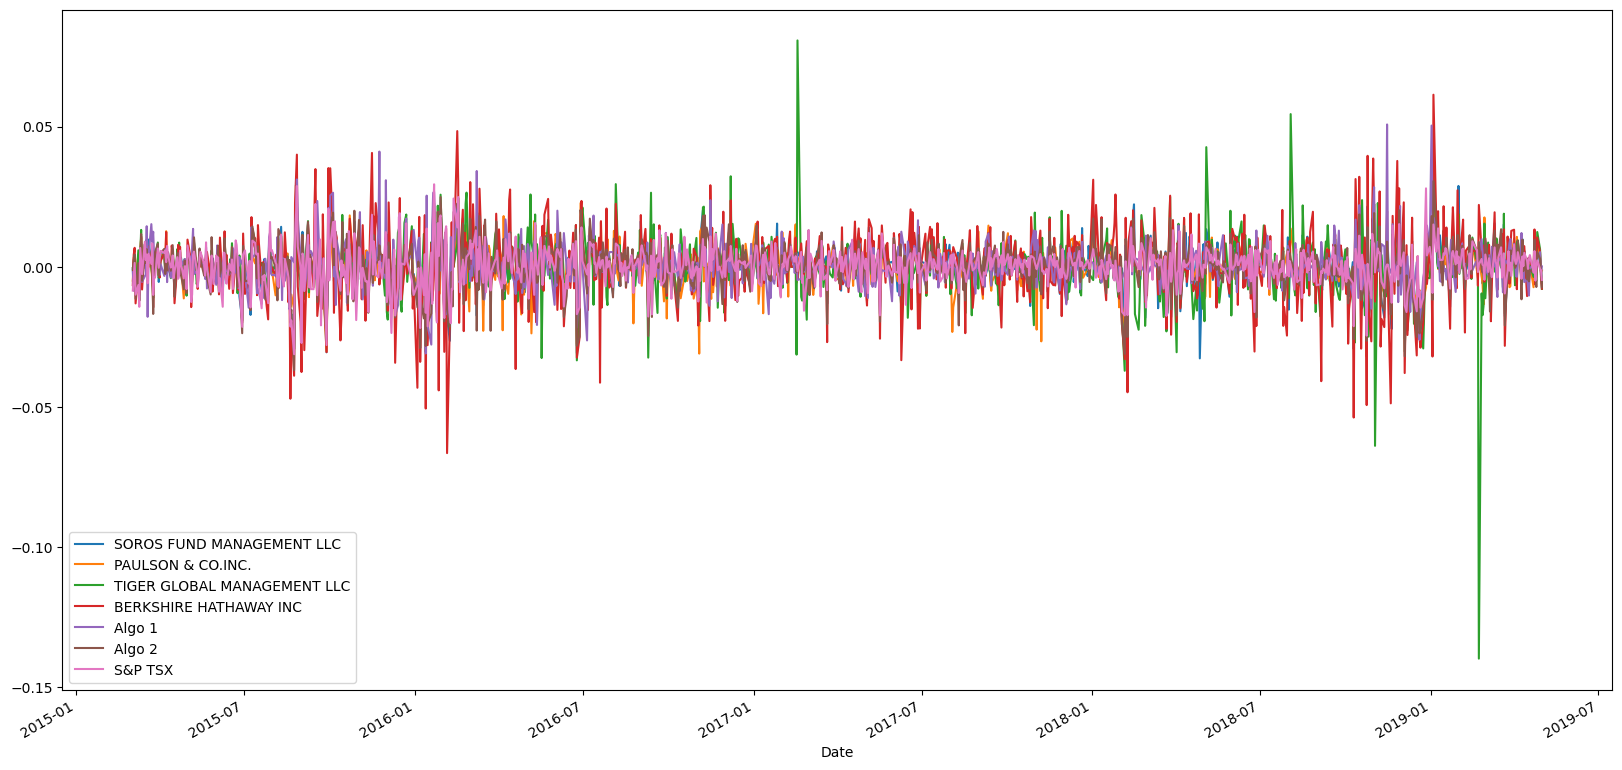

In [22]:
# Plot daily returns of all portfolios
joined_w_a_sp.plot(figsize=(20,10))

<AxesSubplot:title={'center':'Daily Return of Soros Fund Management LLC'}, xlabel='Date'>

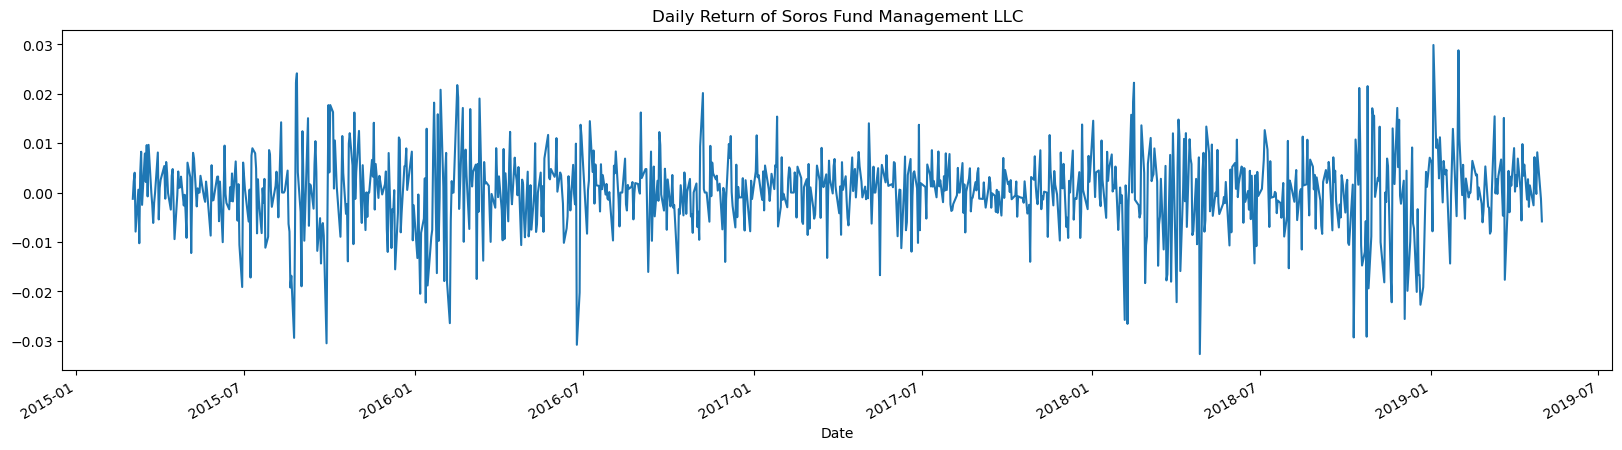

In [23]:
# Plot of Soros Fund management LLC
joined_w_a_sp.iloc[:,0].plot(figsize=(20,5), title="Daily Return of Soros Fund Management LLC")

<AxesSubplot:title={'center':'Paulson & Co. Inc'}, xlabel='Date'>

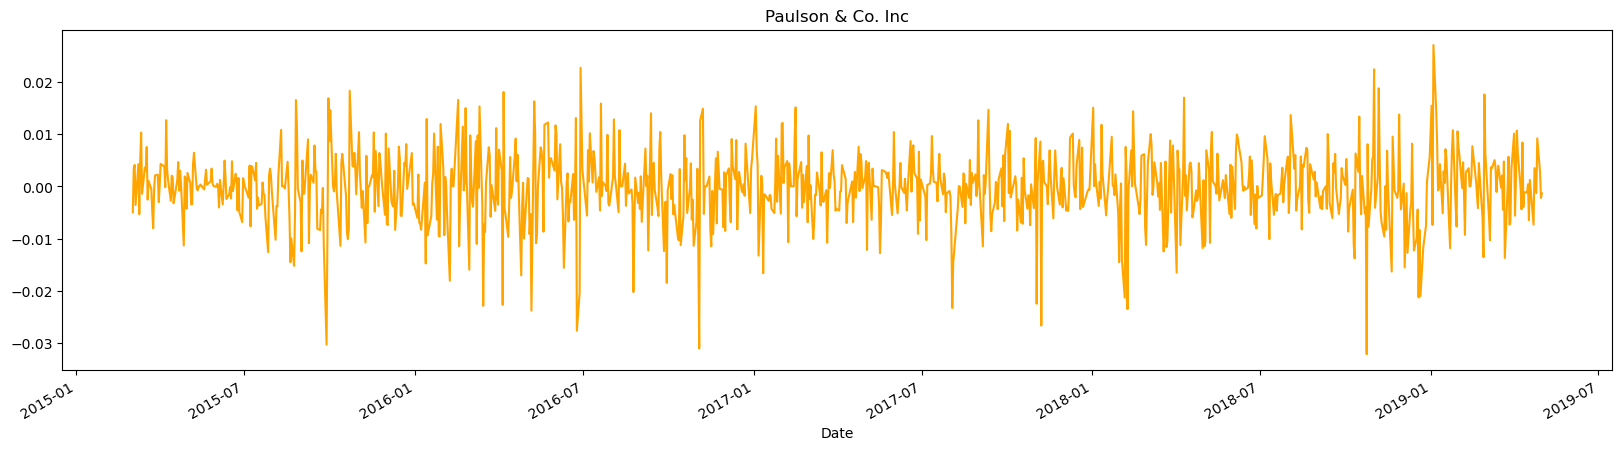

In [24]:
# Plot of Paulson & Co. Inc
joined_w_a_sp.iloc[:,1].plot(figsize=(20,5), color="orange",title="Paulson & Co. Inc")

<AxesSubplot:title={'center':'Tiger Global Management LLC'}, xlabel='Date'>

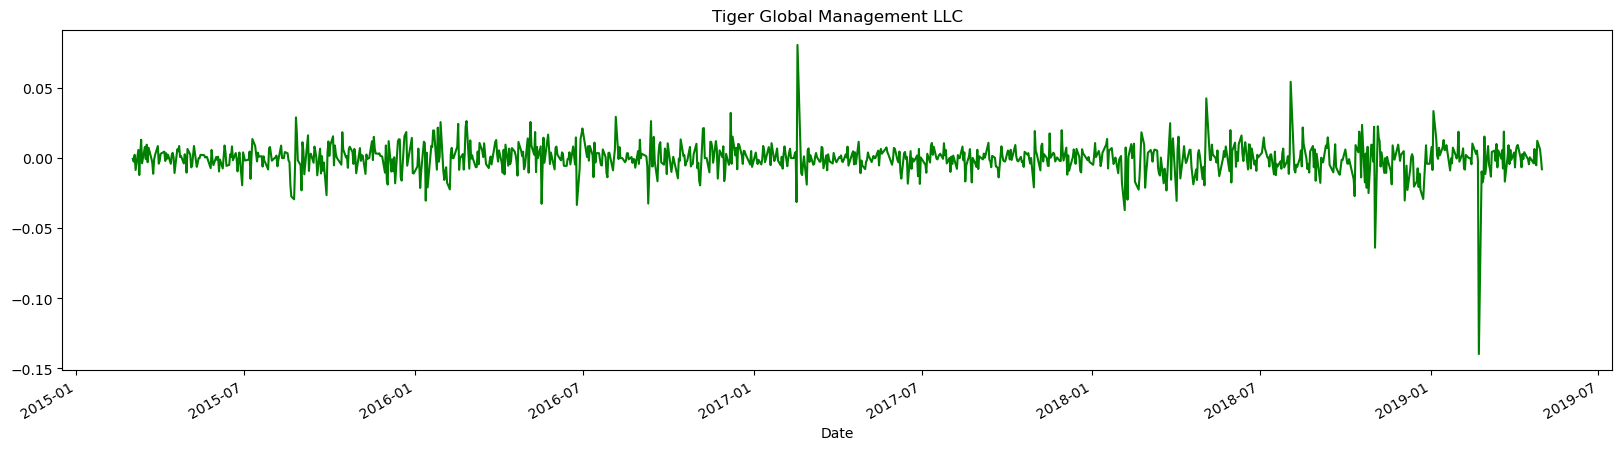

In [25]:
# Plot of Tiger Global Management LLC
joined_w_a_sp.iloc[:,2].plot(figsize=(20,5), color="green", title="Tiger Global Management LLC")

<AxesSubplot:title={'center':'Berkshire Hathaway Inc.'}, xlabel='Date'>

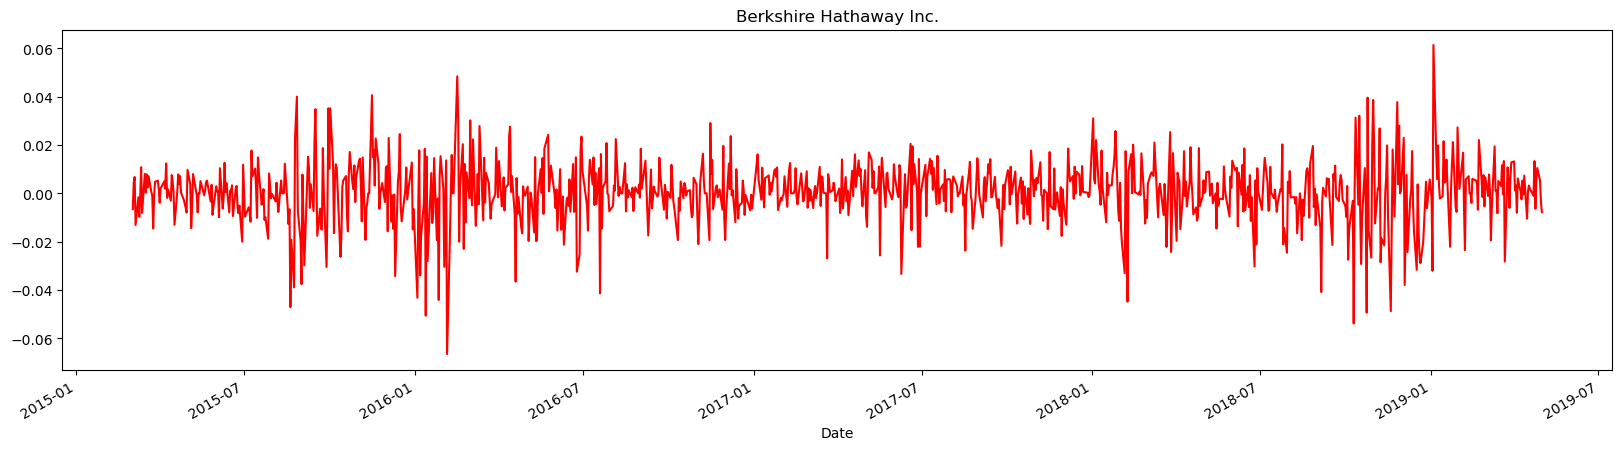

In [26]:
# Plot of Berkshire Hathaway Inc.
joined_w_a_sp.iloc[:,3].plot(figsize=(20,5), color="red", title="Berkshire Hathaway Inc.")

<AxesSubplot:title={'center':'Algorithmic Daily Return: Pattern 1'}, xlabel='Date'>

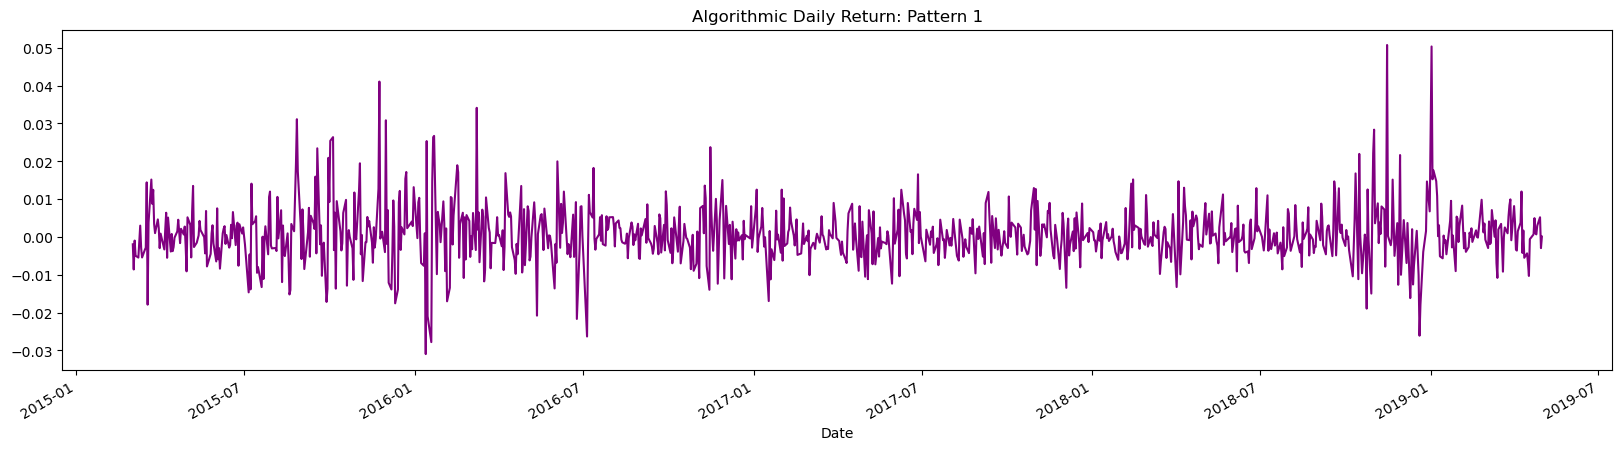

In [27]:
# Plot of Algorithmic Daily Return: Pattern 1
joined_w_a_sp.iloc[:,4].plot(figsize=(20,5), color="purple", title="Algorithmic Daily Return: Pattern 1")

<AxesSubplot:title={'center':'Algorithmic Daily Return: Pattern 2'}, xlabel='Date'>

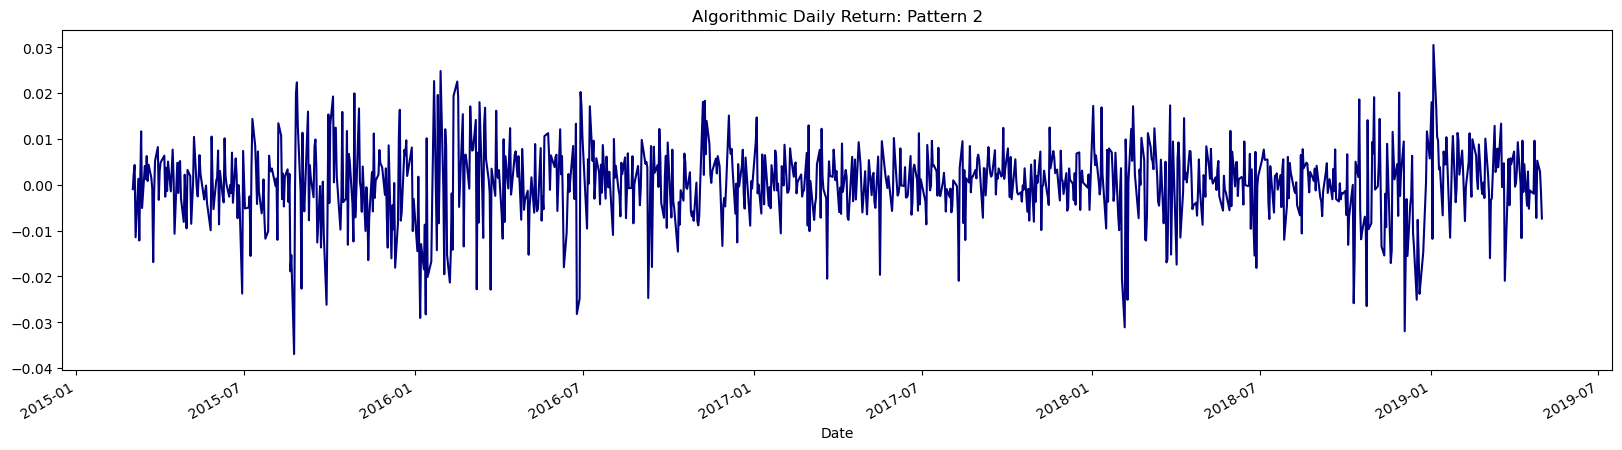

In [28]:
# Plot of Algorithmic Daily Return: Pattern 2
joined_w_a_sp.iloc[:,5].plot(figsize=(20,5), color="navy", title="Algorithmic Daily Return: Pattern 2")

<AxesSubplot:title={'center':'S&P TSX 60 Returns'}, xlabel='Date'>

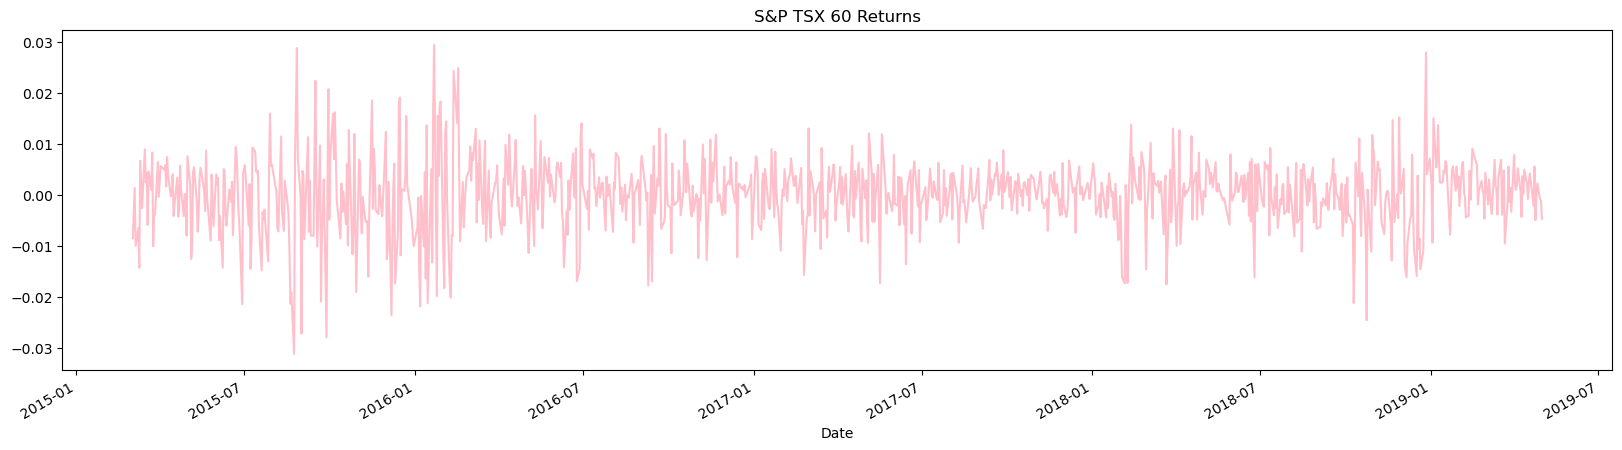

In [29]:
# Plot of S&P TSX 60 Returns
joined_w_a_sp.iloc[:,6].plot(figsize=(20,5), color="pink", title="S&P TSX 60 Returns")

In [30]:
# Calculate cumulative returns of all portfolios.
cumulative_joined_w_a_sp = (1+joined_w_a_sp).cumprod()
cumulative_joined_w_a_sp

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168
...,...,...,...,...,...,...,...
2019-04-25,1.118163,0.754821,0.840272,1.348932,2.011144,1.196390,1.070504
2019-04-26,1.127275,0.761736,0.850654,1.363007,2.017139,1.202677,1.072916
2019-04-29,1.128689,0.763808,0.855971,1.370126,2.027645,1.206080,1.072071


<AxesSubplot:title={'center':'Cumulative Returns for Whale, Algorithmic, and S&P TSX 60 Returns'}, xlabel='Date'>

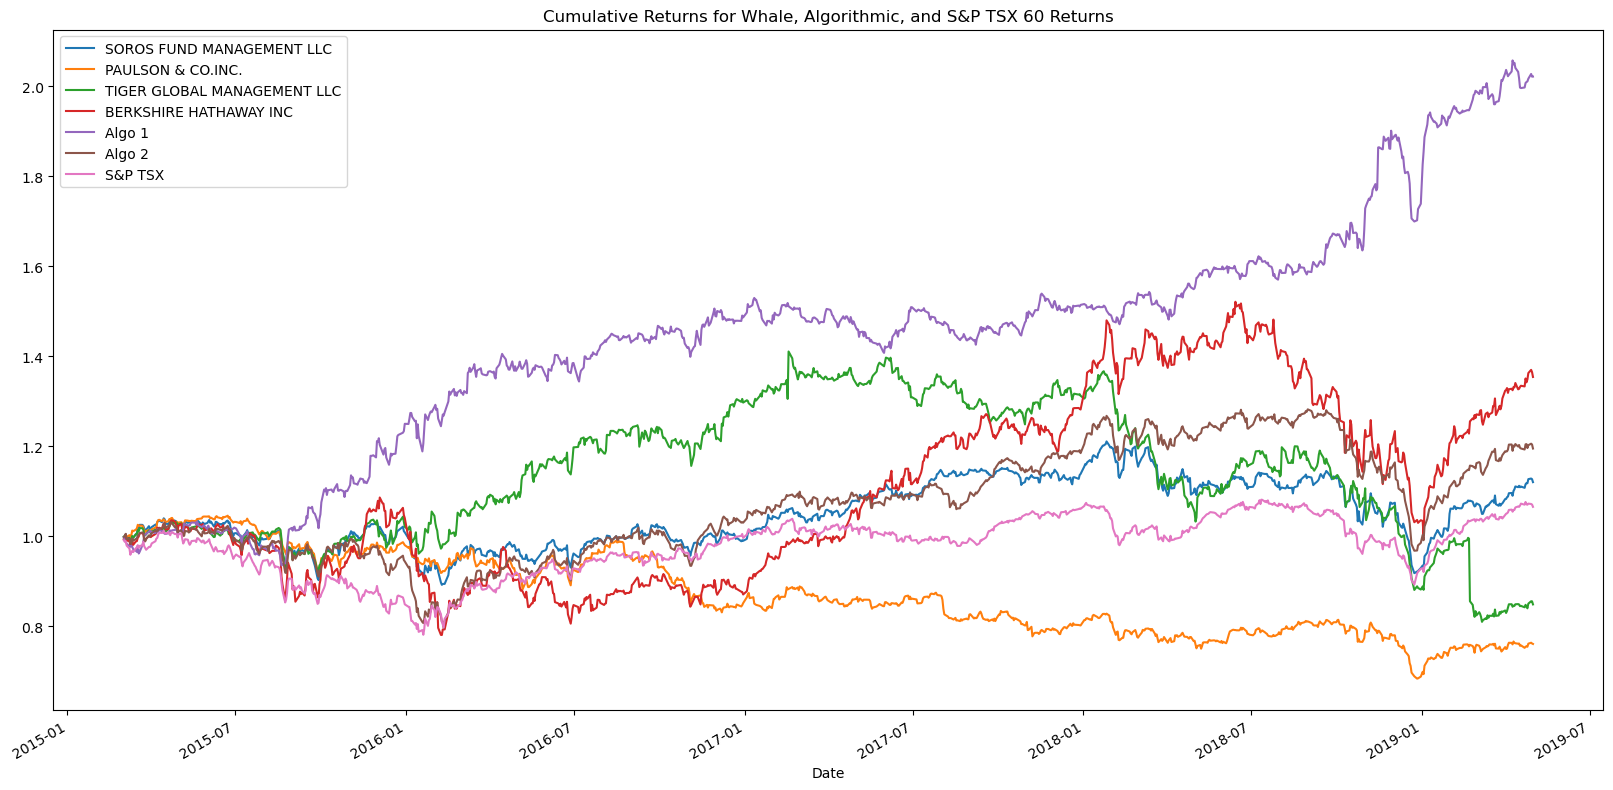

In [31]:
# Plot the Cumulative returns
cumulative_joined_w_a_sp.plot(figsize=(20,10), title="Cumulative Returns for Whale, Algorithmic, and S&P TSX 60 Returns")

In [32]:
joined_w_a_sp.count()

SOROS FUND MANAGEMENT LLC      1029
PAULSON & CO.INC.              1029
TIGER GLOBAL MANAGEMENT LLC    1029
BERKSHIRE HATHAWAY INC         1029
Algo 1                         1029
Algo 2                         1029
S&P TSX                        1029
dtype: int64

In [33]:
# Risk Analysis
# Create a box plot for each portfolio
box_df = pd.DataFrame(np.random.rand(1000,7))
box_df.head()

,0,1,2,3,4,5,6
0,0.706061,0.636297,0.443836,0.875842,0.716919,0.906271,0.101451
1,0.470174,0.782252,0.278881,0.606921,0.195854,0.990023,0.637805
2,0.464252,0.654904,0.127841,0.721935,0.802814,0.736461,0.623284
3,0.454790,0.105834,0.658519,0.489117,0.466069,0.038952,0.580400
4,0.708150,0.301002,0.811873,0.048872,0.272385,0.168656,0.070879


In [93]:
joined_mean = joined_w_a_sp.mean()*100
joined_mean

SOROS FUND MANAGEMENT LLC      0.014137
PAULSON & CO.INC.             -0.024086
TIGER GLOBAL MANAGEMENT LLC   -0.009903
BERKSHIRE HATHAWAY INC         0.037734
Algo 1                         0.071303
Algo 2                         0.020814
S&P TSX                        0.008665
dtype: float64

<AxesSubplot:title={'center':'Daily Returns for Whale, Algorithmic, and S&P TSX 60 Returns'}>

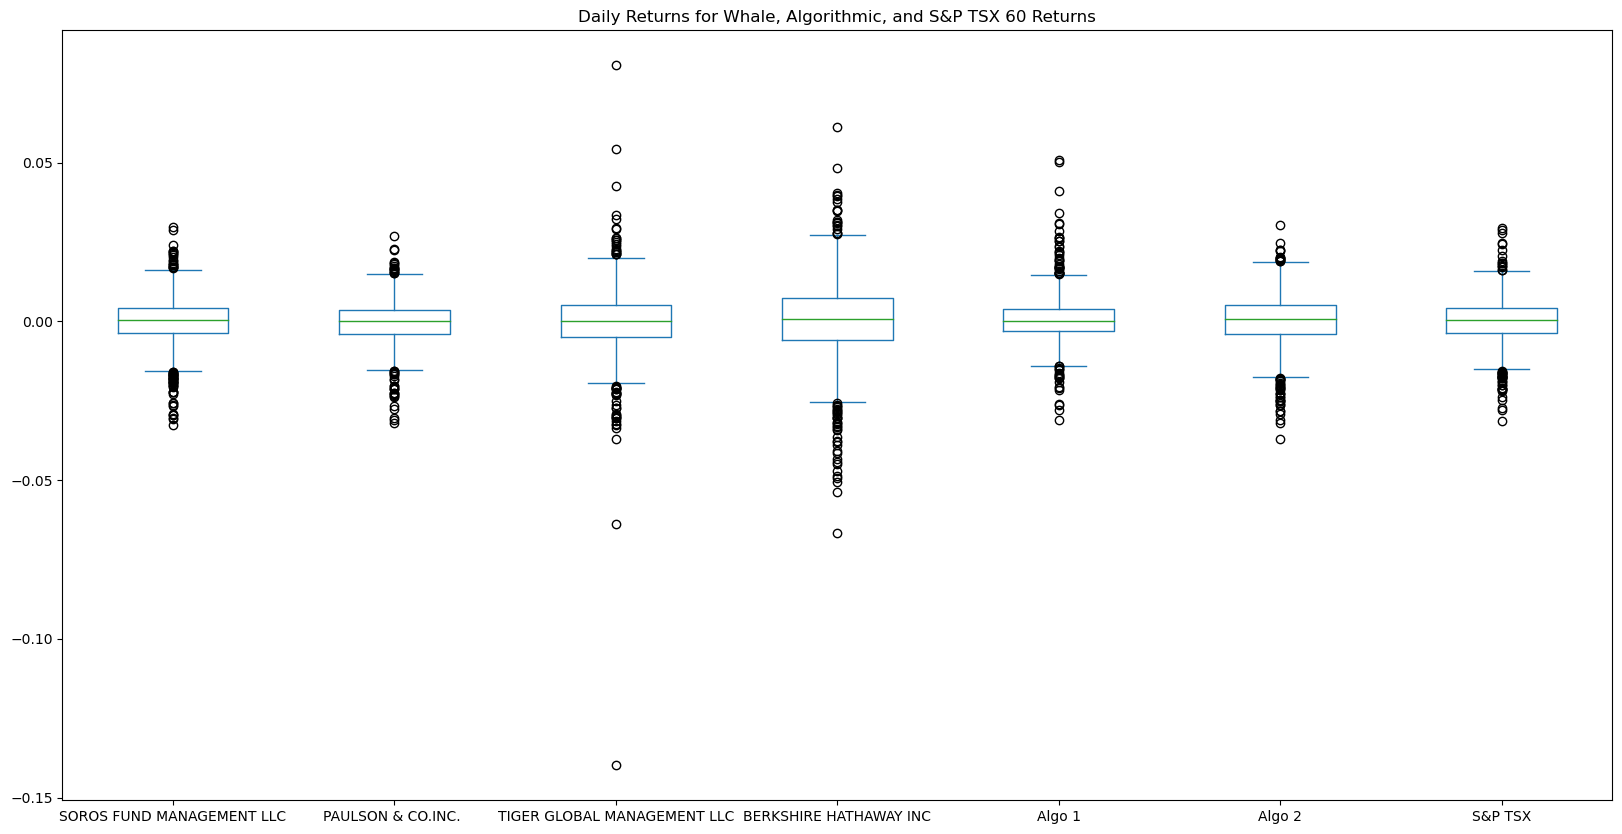

In [34]:
# Box Plot to show the risk keichan I don't know this is the right thing
joined_w_a_sp.plot.box(figsize=(20,10), title="Daily Returns for Whale, Algorithmic, and S&P TSX 60 Returns")

In [94]:
# keichan I don't know this is the right thing to do
#cumulative_joined_w_a_sp.plot.box(figsize=(20,10), title="Cumulative Returns for Whale, Algorithmic, and S&P TSX 60 Returns")

In [36]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_w_a_sp.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

In [37]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

In [38]:
# Rolling statistics
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
rolling_dev_all_portfolios = joined_w_a_sp.rolling(window=21).std()
rolling_dev_all_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


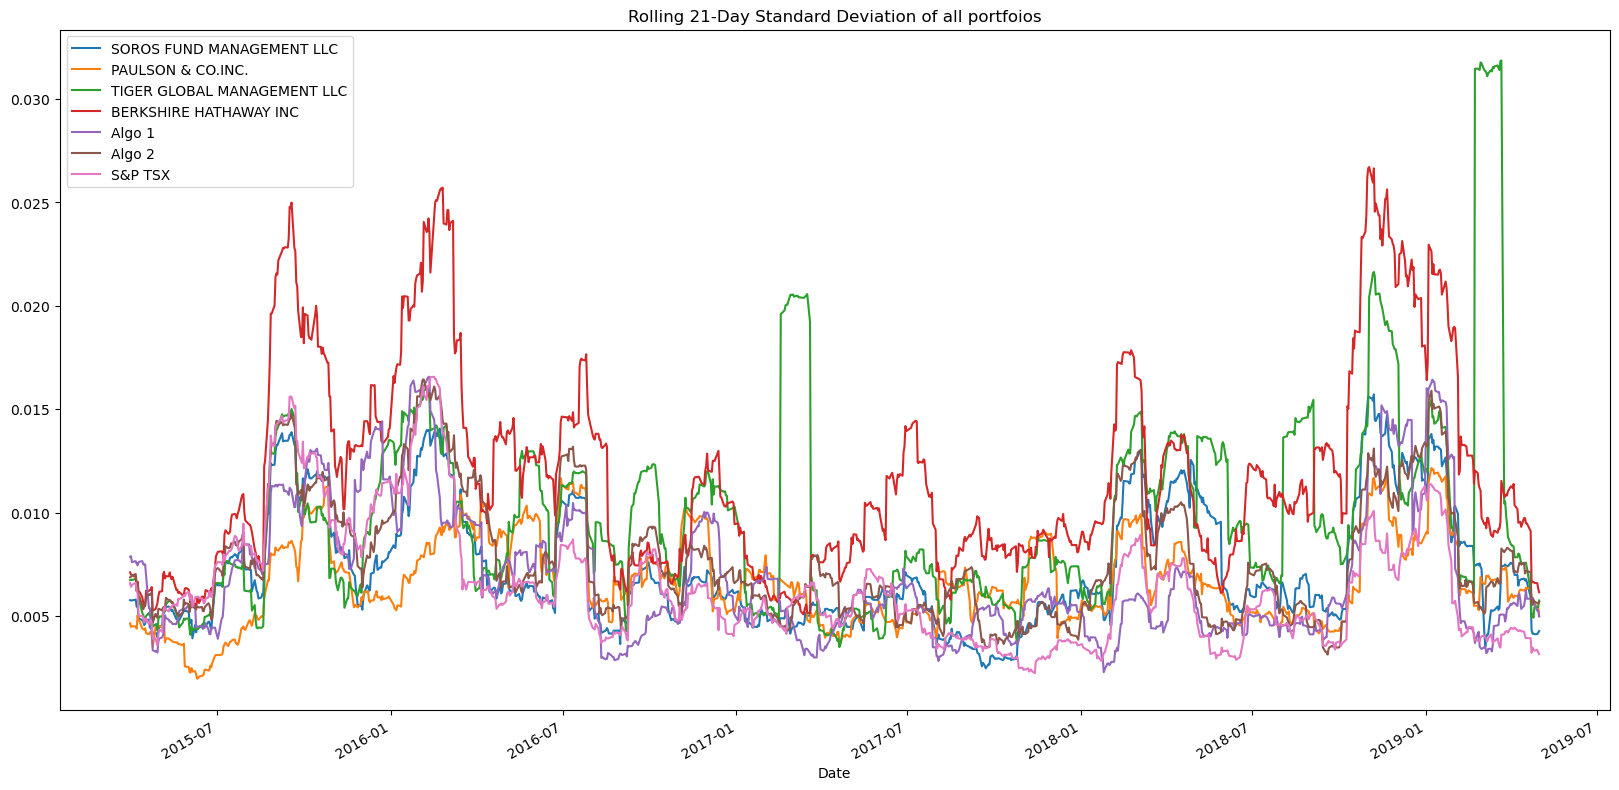

In [39]:
# Calculate the rolling standard deviation for all portfolio
rolling_dev_all_portfolios = joined_w_a_sp.rolling(window=21).std().plot(figsize=(20,10), title="Rolling 21-Day Standard Deviation of all portfoios")

In [95]:
joined_ewm = joined_w_a_sp.ewm(halflife=21).std()
joined_ewm

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


<AxesSubplot:title={'center':'EWM 21-Day Standard Deviation of all portfoios'}, xlabel='Date'>

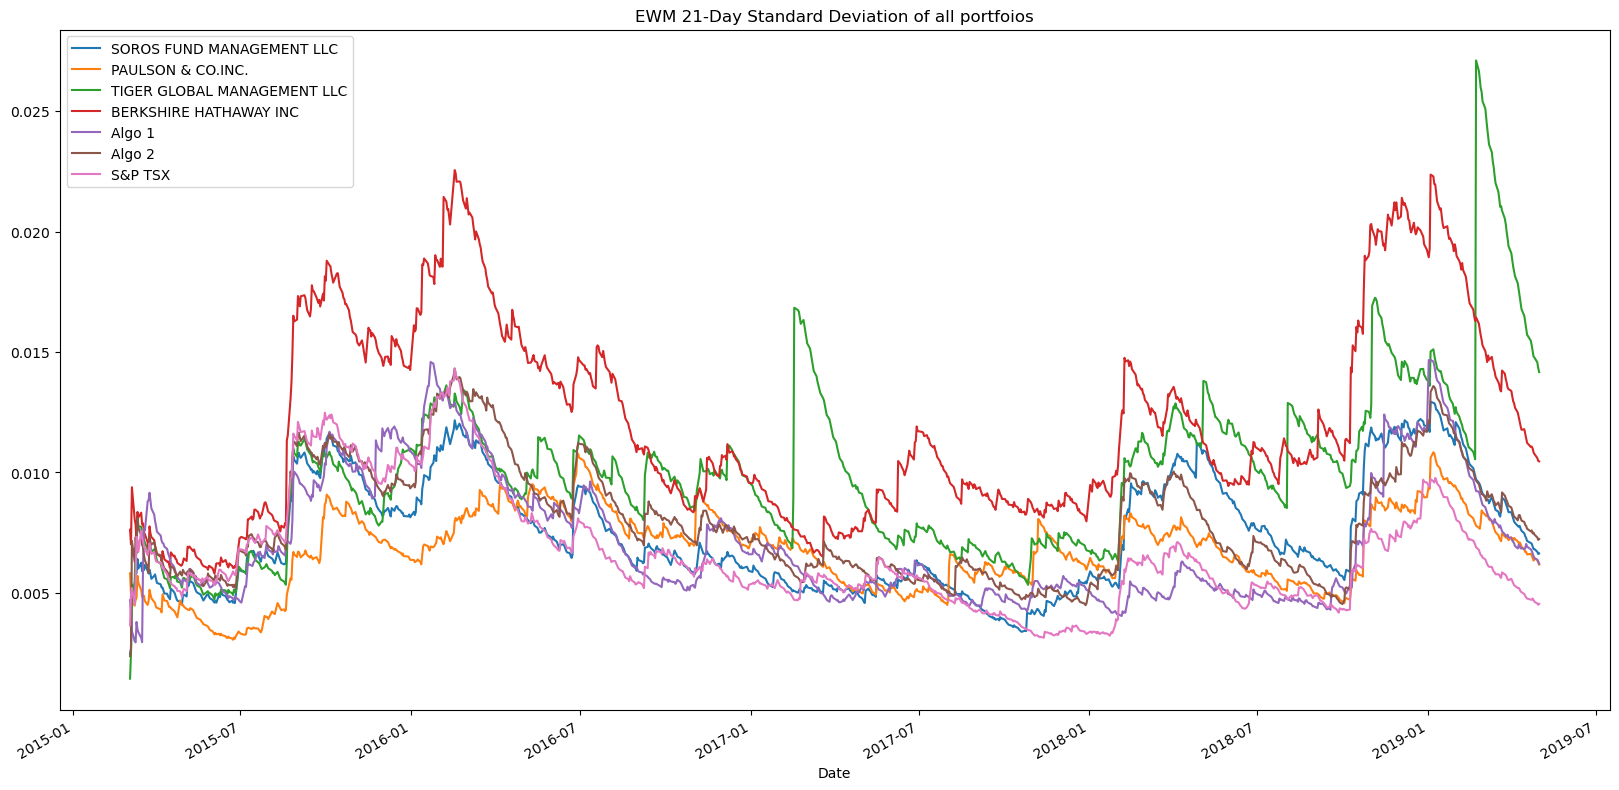

In [97]:
# Plot
joined_ewm.plot(figsize=(20,10), title="EWM 21-Day Standard Deviation of all portfoios")

In [40]:
# Correlation Soros vs. S&P TSX
#soro_vs_sptsx = joined_w_a_sp.iloc[:,[0,6]]

# Plot the data trends of soros vs. S&P TSX
#soro_vs_sptsx.plot(kind="scatter",figsize=(20,10), x="S&P TSX", y="SOROS FUND MANAGEMENT LLC",title="Correlation between SOROS FUND MANGEMENT LLS VS S&P TSX")

correlation = joined_w_a_sp.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

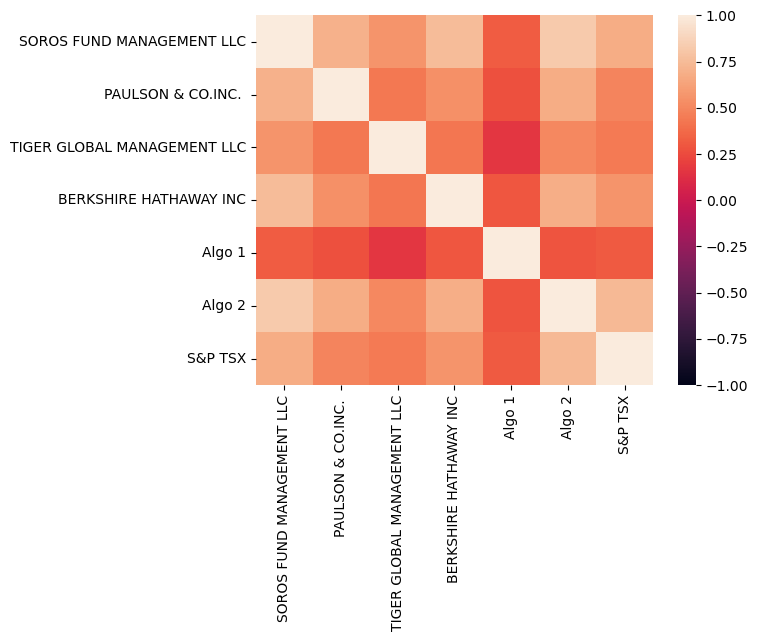

In [41]:
sns.heatmap(correlation, vmin=-1, vmax=1)
# According to the heat map Algo 2 mimicks S&P TSX

In [42]:
# Calculate covariance of Algo 2
covar_algo2_sp = joined_w_a_sp["Algo 2"].cov(joined_w_a_sp["S&P TSX"])
covar_algo2_sp

4.318704430084258e-05

In [43]:
# Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX
# Calculate covariance of Algo 1 vs. S&P 500
covar_algo1_sp = joined_w_a_sp["Algo 1"].cov(joined_w_a_sp["S&P TSX"])
covar_algo1_sp

1.6563000308911378e-05

In [44]:
# Calculate variance of S&P TSX
tsx_var = joined_w_a_sp["S&P TSX"].var()
tsx_var

4.9479515915131015e-05

In [45]:
# Calcuate Beta of Algo 2
algo2_beta = covar_algo2_sp / tsx_var
algo2_beta

0.8728267344999595

In [46]:
# Calculate Beta of Algo 1
algo1_beta = covar_algo1_sp / tsx_var
algo1_beta

0.33474459081856844

In [47]:
covar_tiger_sp = joined_w_a_sp["TIGER GLOBAL MANAGEMENT LLC"].cov(joined_w_a_sp["S&P TSX"])
covar_tiger_sp

3.372724149435498e-05

In [48]:
tiger_beta = covar_tiger_sp / tsx_var
tiger_beta

0.6816404904244641

<AxesSubplot:title={'center':'Rolling 30-Day Covaiance of Algo 1 vs. S&P Returns'}, xlabel='Date'>

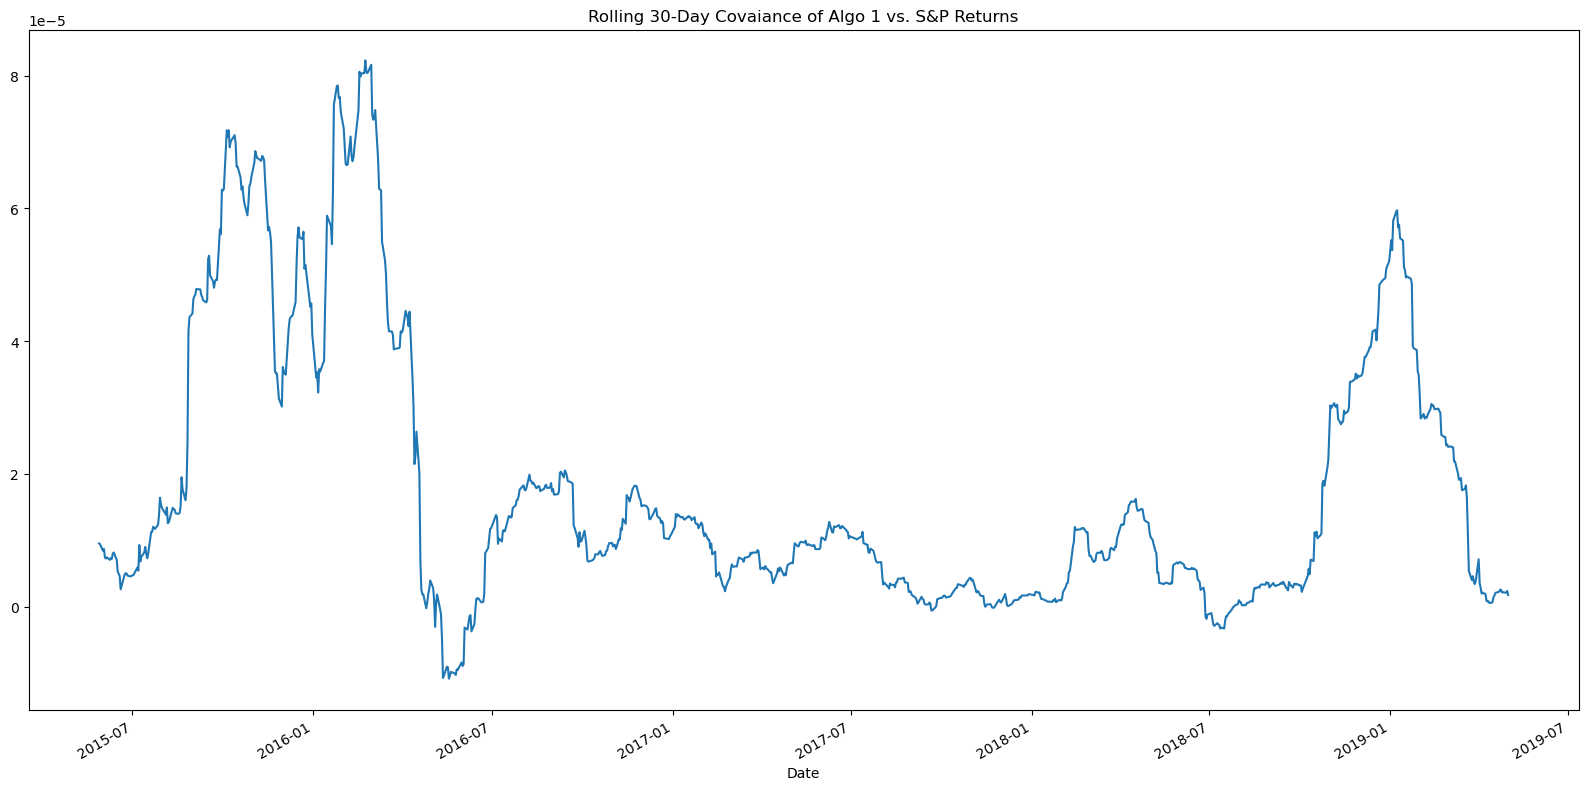

In [49]:
# Plot 60 day algo 1 beta trend 
algo1_beta_cov = joined_w_a_sp["Algo 1"].rolling(window=60).cov(joined_w_a_sp["S&P TSX"])
algo1_beta_cov.plot(figsize=(20,10), title="Rolling 30-Day Covaiance of Algo 1 vs. S&P Returns")

<AxesSubplot:title={'center':'Rolling 30-Day Covaiance of Algo 1 vs. S&P Returns'}, xlabel='Date'>

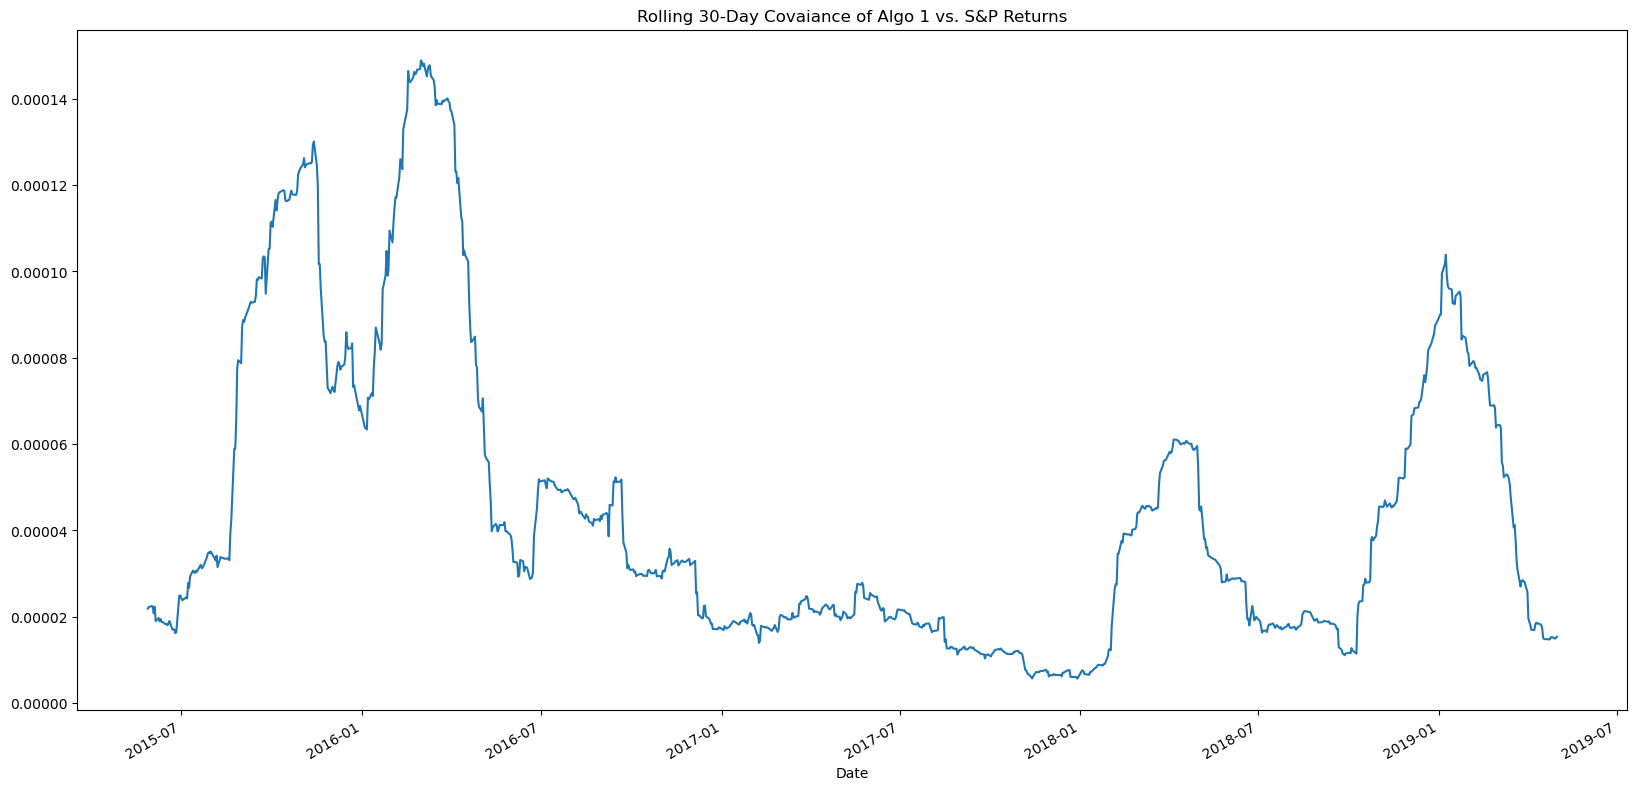

In [50]:
# Plot 60 day algo 1 beta trend 
algo2_beta_cov = joined_w_a_sp["Algo 2"].rolling(window=60).cov(joined_w_a_sp["S&P TSX"])
algo2_beta_cov.plot(figsize=(20,10), title="Rolling 30-Day Covaiance of Algo 1 vs. S&P Returns")

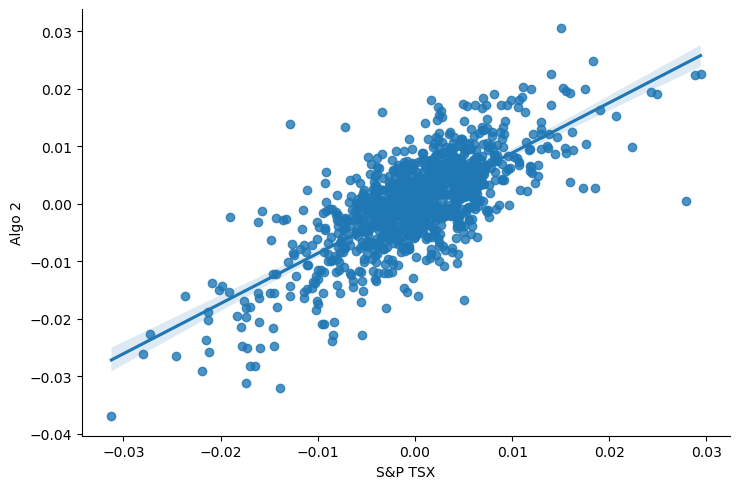

In [62]:
joined_algo2_sp = joined_w_a_sp.iloc[:,5:7]
sns.lmplot(x="S&P TSX", y="Algo 2", data=joined_algo2_sp, aspect=1.5, fit_reg=True)

In [68]:
# Calculate Annualized sharpe ratios
sharpe_ratios = (joined_w_a_sp.mean() * 252)/(joined_w_a_sp.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

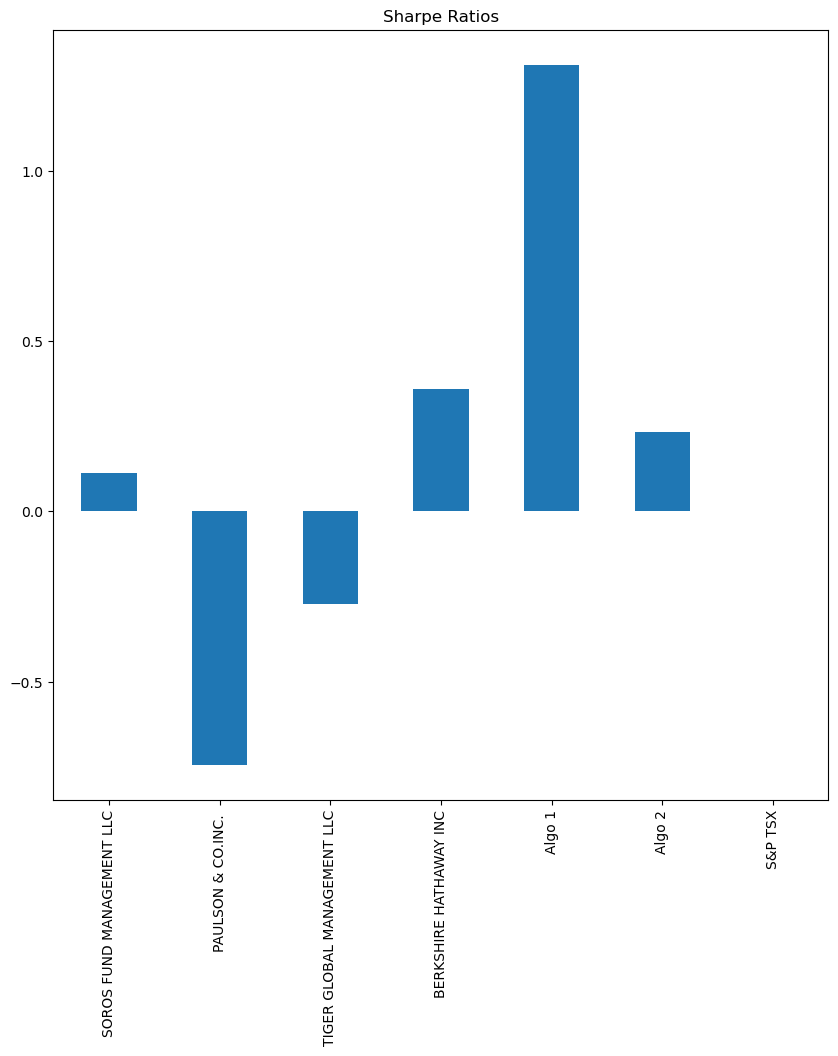

In [66]:
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", figsize=(10,10), title="Sharpe Ratios")

In [91]:
# To compare the Whale's portfolio, Algo's portfolio and S&P portfolio, calculate each group's sharpe ration

# Create Whale,algo, sp returns
whale_returns = joined_w_a_sp.iloc[:,0:4]
algo_returns = joined_w_a_sp.iloc[:,4:6]
sp_returns = joined_w_a_sp["S&P TSX"]

# Calculate sharpe ratios
whale_sharpe_ratios = whale_returns.mean()*252/(whale_returns.std()*np.sqrt(252))
whale_sharpe_ratio_avg = whale_sharpe_ratios.mean()
algo_sharpe_ratios = algo_returns.mean()*252/(algo_returns.std()*np.sqrt(252))
algo_sharpe_ratio_avg = algo_sharpe_ratios.mean()
sp_sharpe_ratios = sp_returns.mean()*252/(sp_returns.std()*np.sqrt(252))

print("Whale" ,whale_sharpe_ratio_avg)
print("Algo", algo_sharpe_ratio_avg)
print("S&P", sp_sharpe_ratios)

Whale 0.015426198987596229
Algo 0.9441655376048226
S&P 0.19555028784301404


In [86]:
# Find out which portfolios are the best investment keichan needs to critique

def determine_best_portfolio(portfolio_name1, portfolio_name2, portfolio_name3, portfolio1, portfolio2, portfolio3):
    result_name = ""
    
    if portfolio1 >= portfolio2 and portfolio1 >= portfolio3:
        result_name = portfolio_name1
        result = portfolio1
        return result_name, result
    elif portfolio2 >= portfolio3:
        result_name = portfolio_name2
        result = portfolio2
        return result_name, result
    else: 
        result_name = portfolio_name3
        result = portfolio3
        return result_name3, result
        
        
return_value = determine_best_portfolio("Algo","Whale","S&P",algo_sharpe_ratio_avg, whale_sharpe_ratio_avg, sp_sharpe_ratios) 
        
        
print(f"{return_value[0]}'s portfolio's sharpe ratio is the best. It's sharpe ratio is {round(return_value[1],2)}")

          

Algo's portfolio's sharpe ratio is the best. It's sharpe ratio is 0.94
